In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


## Preparar dados

In [2]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [3]:
train_images = os.path.join('Rock-Paper-Scissors', 'train')
validation_images = os.path.join('Rock-Paper-Scissors', 'test')

In [4]:
train_images_rock = os.path.join(train_images,'rock')
train_images_paper = os.path.join(train_images,'paper')
train_images_scissors = os.path.join(train_images,'scissors')
validation_images_rock = os.path.join(validation_images,'rock')
validation_images_paper = os.path.join(validation_images,'paper')
validation_images_scissors = os.path.join(validation_images,'scissors')

In [5]:
num_rock_tr = len(os.listdir(train_images_rock))
num_paper_tr = len(os.listdir(train_images_paper))
num_scissors_tr = len(os.listdir(train_images_scissors))

num_rock_val = len(os.listdir(validation_images_rock))
num_paper_val = len(os.listdir(validation_images_paper))
num_scissors_val = len(os.listdir(validation_images_scissors))

In [6]:
total_train = num_rock_tr + num_paper_tr + num_scissors_tr
total_validation = num_rock_val + num_paper_val + num_scissors_val

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')

validation_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
BATCH_SIZE = 32
IMG_SHAPE = 300 # square image

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_images,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE, IMG_SHAPE),
                                                          class_mode='binary')

validation_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                         directory=validation_images,
                                                         shuffle=False,
                                                         target_size=(IMG_SHAPE, IMG_SHAPE),
                                                         class_mode='binary')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


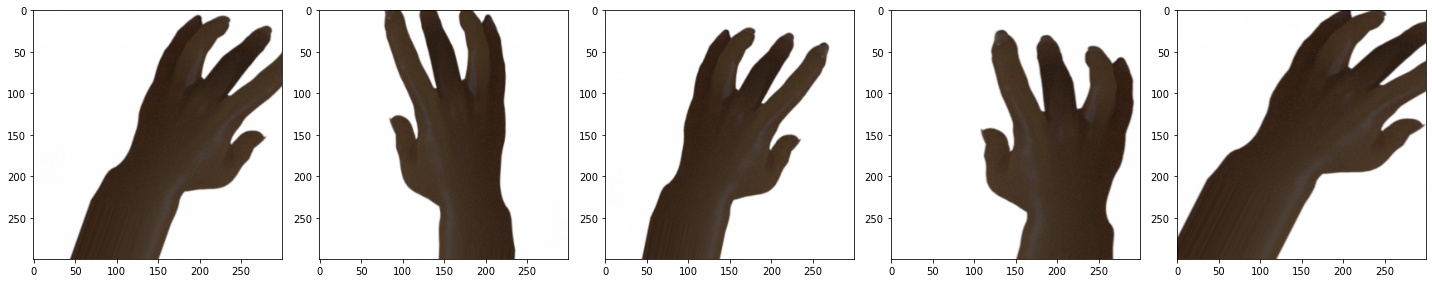

In [10]:
images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)

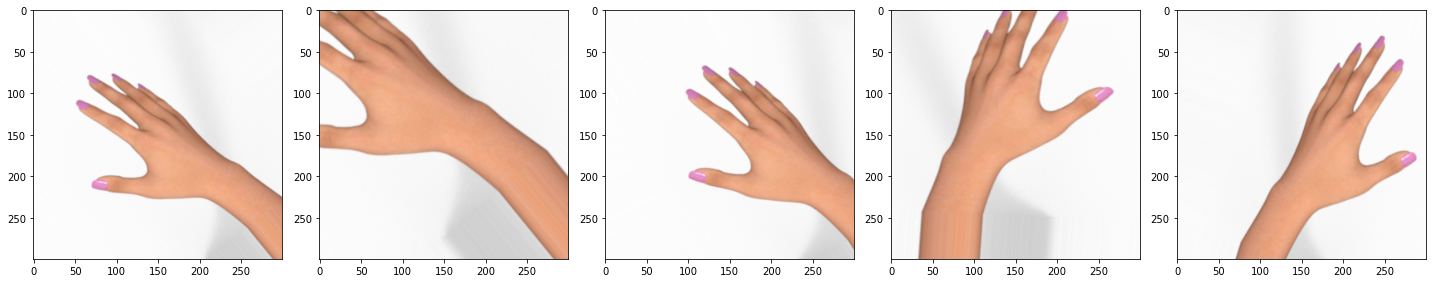

In [11]:
images_val = [validation_data_gen[0][0][0] for i in range(5)]
plotImages(images_val)

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    
    keras.layers.Dense(3, activation='softmax')
    
])

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit_generator(train_data_gen,
                             steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
                              epochs=10,
                              validation_data=validation_data_gen,
                              validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE)))
                             )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
79/79 [==============================] - 164s 2s/step - loss: 1.1443 - accuracy: 0.3571 - val_loss: 1.1185 - val_accuracy: 0.3414
Epoch 2/10
79/79 [==============================] - 150s 2s/step - loss: 0.9705 - accuracy: 0.5079 - val_loss: 0.8014 - val_accuracy: 0.6613
Epoch 3/10
79/79 [==============================] - 153s 2s/step - loss: 0.7138 - accuracy: 0.6627 - val_loss: 0.5245 - val_accuracy: 0.7930
Epoch 4/10
79/79 [==============================] - 155s 2s/step - loss: 0.5535 - accuracy: 0.7655 - val_loss: 0.4428 - val_accuracy: 0.8306
Epoch 5/10
79/79 [==============================] - 166s 2s/step - loss: 0.3894 - accuracy: 0.8385 - val_loss: 0.3030 - val_accuracy: 0.8844
Epoch 6/10
79/79 [==============================] - 180s 2s/step - loss: 0.2883 - accuracy: 0.8948 - val_loss: 0.3255 - val_accuracy: 0.8978
Epoch 7/10
79/79 [==============================] - 180s 2s/step - loss: 0.254

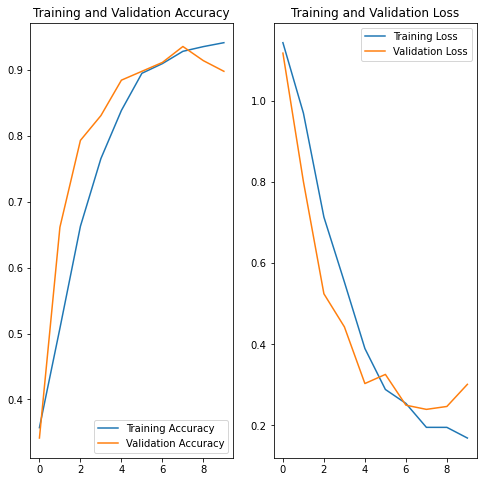

In [20]:
# Analisando
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
